First Strategy: Gradient Descent
    
    Why did you think it would work?
        We believed it would work since it would iteratively attempt to fit the data by going to the steepest point
        where it cannot move anymore downhill. We believed it would be optimal since it would minimize the parameters for 
        our function. 
    
    

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import datasets, linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

# download Titanic dataset and place in your working directory, so that this command will find your file
train = pd.read_csv("train.csv")
#
# Divide input data X from labeled values to predict Y
x_train = train.loc[:, 'Pclass':]
y_train = train.loc[:, 'Survived']

# Used to check and see what is inside the dataset
# print(x_train)
# print(y_train)


# Clean up the data a bit so that it can processed by the decision tree
x_train['Embarked'] = [0 if str(name) == "nan" else ord(name) for name in x_train['Embarked']]
x_train['Cabin'] = [0 if str(el) == "nan" else len(str(el)) for el in x_train['Cabin']]
x_train['Ticket'] = [0 if str(el) == "nan" else len(str(el)) for el in x_train['Ticket']]

def sumASCII(name):
    accum = 0
    for i in name:
        accum += ord(i)
    return accum

# Cleaning the data for feature, Name and Sex
x_train['Name'] = [0 if str(name) == "nan" else sumASCII(str(name)) for name in x_train['Name']]
x_train['Sex'] = [0 if sex == 'male' else 1 for sex in x_train['Sex']]


# Just give up on these for now
x_train = x_train.fillna(0)


clf = SGDClassifier(loss="hinge",alpha=0.01,max_iter=200)
clf.fit(x_train,y_train)

# This predict function is a way to give labels for samples in x_train.
y_pred = clf.predict(x_train)
y_true = y_train

# The precision_recall_fscore_support function will compute the 
# precision, recall, F-measure and support for each class

precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred, average='macro')
print("Precision value is", precision)
print("Recall value is", recall)
print("Fscore value is", fscore)

# # Plot outputs
# xx = np.linspace(-1, 5, 10)
# yy = np.linspace(-1, 5, 10)

# X1, X2 = np.meshgrid(xx, yy)
# Z = np.empty(X1.shape)
# for (i, j), val in np.ndenumerate(X1):
#     x1 = val
#     x2 = X2[i, j]
#     p = clf.decision_function([[x1, x2]])
#     Z[i, j] = p[0]
# levels = [-1.0, 0.0, 1.0]
# linestyles = ['dashed', 'solid', 'dashed']
# colors = 'k'
# plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
# plt.scatter(x_train[:, 0], x_train[:, 1], c=Y, cmap=plt.cm.Paired,
#             edgecolor='black', s=20)

# plt.axis('tight')
# plt.show()


# fig = plt.figure(figsize=(100,100))
#
#
# plt.plot(x_train, y_pred, color='blue', linewidth=5)
#
# plt.xticks(())
# plt.yticks(())
#
# plt.show()


Precision value is 0.6847395243488108
Recall value is 0.5069504361997891
Fscore value is 0.3991260973663208


Quality/depth of visualizations/tests?

We learned that gradient descent is a decent solution to predict the data, however it is not perfect. Running the solution above gives different values for the precision, recall, and fscore. We learned this during testing, and it served as one of our tests, however it led to more confusion. 

What did you learn about how it performed from your visualizations/tests?

For testing we simply ran the precision_recall_fscore_support function, so that we could see how accurate the predictions came to the real data. We learned that gradient is less accurate when there are less features. We decide to go with the testing side of things because visualization can be done later once the testing and accuracy are verified. 

Second Strategy: Decision Trees

    Why did you think it would outperform your first strategy?
    
    We believed this strategy would outperform the first since decision trees create thresholds based on every
    feature. The features would all be used to further distinguish both sides; survived & not-survived. As a result, all we
    would need to do is traverse down the decision tree and it should arrive at the correct threshold based on the data.
    
    
    

(1.0, 1.0, 1.0, None)


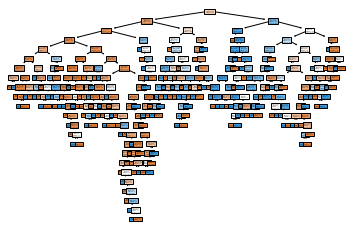

In [24]:
from sklearn import tree, metrics
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_csv("train.csv") # download Titanic dataset and place in your working directory, so that this command will find your file
clf = tree.DecisionTreeClassifier()

# Divide input data X from labeled values to predict Y
X = train.loc[:,'Pclass':]
Y = train.loc[:,'Survived']

# Clean up the data a bit so that it can processed by the decision tree
# A more serious attempt would extract more subtle features from the data.
X['Embarked'] = [0 if str(name) == "nan" else ord(name) for name in X['Embarked']]
X['Cabin'] = [0 if str(el) == "nan" else len(str(el)) for el in X['Cabin']]
X['Ticket'] = [ 0 if str(el) == "nan" else len(str(el)) for el in X['Ticket']]

def sumASCII(name):
    accum = 0
    for i in name:
        accum += ord(i)
    return accum

# Cleaning more of the features
X['Name'] = [0 if str(name) == "nan" else sumASCII(str(name)) for name in X['Name']]
X['Sex'] = [0 if sex == 'male' else 1 for sex in X['Sex']]

# The NaN will be set to 0 using the fillna function
X = X.fillna(0)

# train the model
clf = clf.fit(X, Y)

# run predictions on the data, using the model. They should mostly conform to the training values Y
y_pred = clf.predict(X)
# figure() will plot the figure to the screen
fig = plt.figure()
_ = tree.plot_tree(clf, feature_names=X.columns, filled=True)
returnVal = metrics.precision_recall_fscore_support(Y, y_pred, average="macro")
print(returnVal)

# savefig() will save the image generated to a local file
fig.savefig("tree.png")
# Show the image onto the screen
plt.show()


What did you learn about how it performed from your visualizations/tests?

Based on the tests, the decision tree method had a precision score of 1.0. It was able to predict the data 100% of the time since the decision tree has several defined threshold that categorizes the survived and non-survived. As a result, we learned that decision trees one of the best ways to train the data if you have several features.